Original Image:


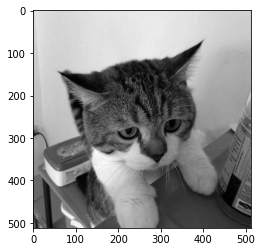

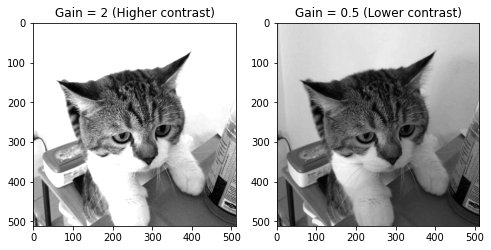

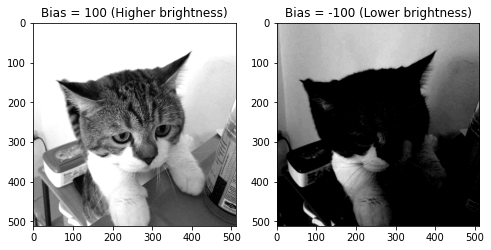

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("kitty.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Original Image:")
plt.imshow(img_gray, cmap="gray")
plt.show()

# gain = 2
img_a1 = cv2.multiply(img_gray, 2)

# gain = 0.5
img_a2 = cv2.divide(img_gray, 2)

fig1 = plt.figure(figsize=(8, 4))
ax1 = fig1.add_subplot(1,2,1)
plt.imshow(img_a1, cmap="gray")
ax2 = fig1.add_subplot(1,2,2)
ax1.set(title="Gain = 2 (Higher contrast)")
ax2.set(title="Gain = 0.5 (Lower contrast)")
plt.imshow(img_a2, cmap="gray")
plt.show()

# bias = 100
img_b1 = cv2.add(img_gray, 100)

# bias = -100
img_b2 = cv2.add(img_gray, -100)

fig2 = plt.figure(figsize=(8, 4))
ax3 = fig2.add_subplot(1,2,1)
plt.imshow(img_b1, cmap="gray")
ax4 = fig2.add_subplot(1,2,2)
ax3.set(title="Bias = 100 (Higher brightness)")
ax4.set(title="Bias = -100 (Lower brightness)")
plt.imshow(img_b2, cmap="gray")
plt.show()





Original Image:


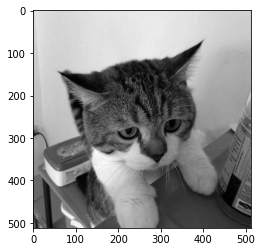

Stretched Image:
[[216 216 216 ... 216 216 216]
 [216 216 216 ... 216 216 216]
 [216 216 216 ... 216 216 216]
 ...
 [ 36  40  40 ...  12  10  11]
 [ 36  40  40 ...  15  14  13]
 [ 34  38  39 ...  17  16  16]]


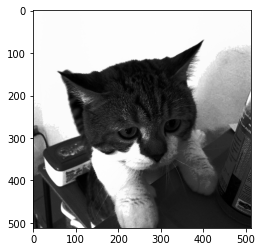

In [112]:
print("Original Image:")
img = cv2.imread("kitty.jpg")
plt.imshow(img_gray, cmap="gray")
plt.show()

r1 = 100
r2 = 150
s1 = 50
s2 = 200

def stretch(img, r1, r2, s1, s2):
  # flexible r1, r2, s1, s2
  stretched = np.zeros_like(img)
  max = np.max(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i, j] < r1:
        gain = s1/r1
        bias = 0
      elif img[i, j] > r2:
        gain = (max-s2) / (max-r2) 
        bias = max - ((max-s2) / (max-r2))
      elif img[i, j] >= r1 and img[i, j] <= r2:
        gain = (s2-s1) / (r2-r1) 
        bias = s2-((s2-s1)/(r2-r1)*r2)
      stretched[i, j] = img[i, j] * gain + bias
  return stretched

img_stretched = stretch(img_gray, r1, r2, s1, s2)

print("Stretched Image:")
print(img_stretched)
plt.imshow(img_stretched, cmap="gray")
plt.show()